In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
Df = load_boston()

In [3]:
df = pd.DataFrame(Df.data, columns=Df.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MEDV'] = Df.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


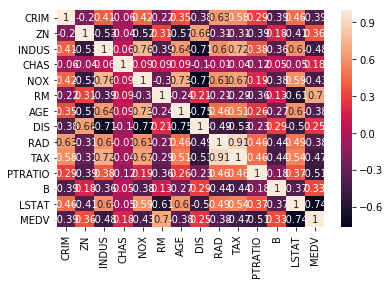

In [6]:
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True)

In [47]:
df.shape

(506, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [49]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [51]:
x=df.drop(['MEDV'],axis=1) 
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate  
y=df['MEDV']

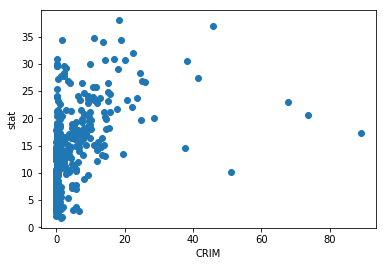

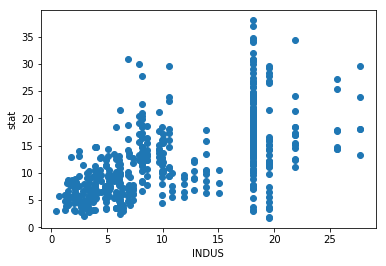

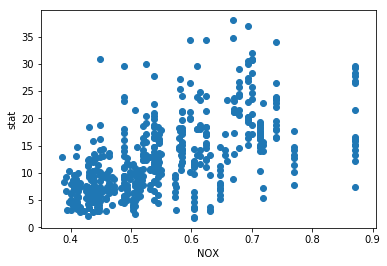

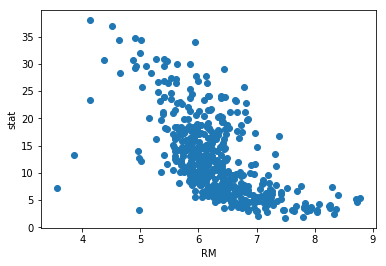

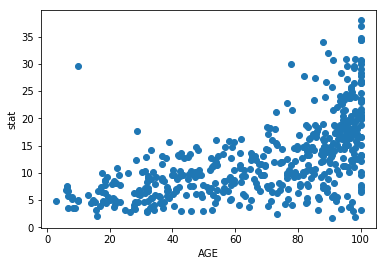

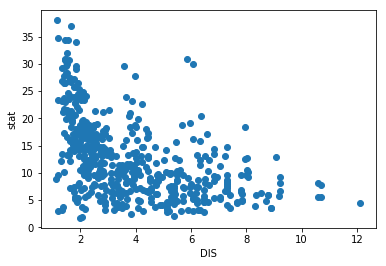

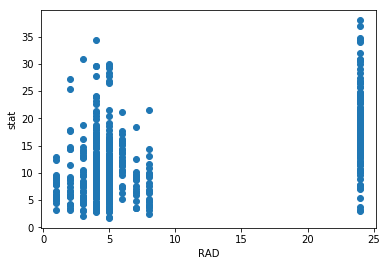

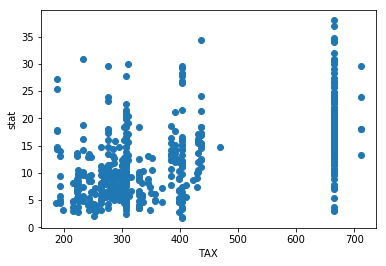

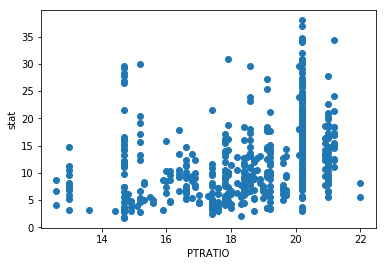

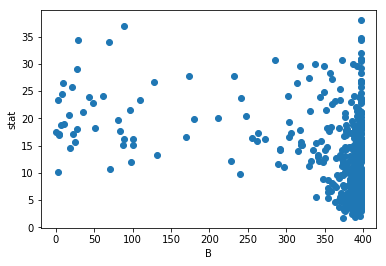

In [14]:
for col in x.columns:
    if(col != ['LSTAT']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('stat')
        plt.show()

In [52]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])

Y = df['MEDV']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [56]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
from sklearn.metrics import r2_score
score= r2_score(reg.predict(X_test),Y_test)
score

0.6058409943035202

In [58]:
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [67]:
loaded_model = pickle.load(open(r'C:\Users\Dhivya Bharathi\Downloads\finalized_model.pickle', 'rb'))
a=loaded_model.predict(x.transform([[4.98,6.575]]))
a

ValueError: no results

In [ ]:
scaler_test = StandardScaler()

In [69]:
# prediction using the saved model.
loaded_model = pickle.load(open(r'C:\Users\Dhivya Bharathi\Downloads\finalized_model.pickle', 'rb'))
prediction=loaded_model.predict(([[4.98,6.575]]))
print(prediction[0])

29.339665479262134


In [7]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'],df['RAD'],df['AGE']], columns = ['LSTAT','RM','RAD','AGE'])
Y = df['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [9]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# prediction using the saved model.
loaded_model = pickle.load(open(r'C:\Users\Dhivya Bharathi\Downloads\finalized_model.pickle', 'rb'))
prediction=loaded_model.predict(([[4.98,6.575]]))
print(prediction[0])

29.339665479262134


In [11]:
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [13]:
# prediction using the saved model.
loaded_model = pickle.load(open(r'C:\Users\Dhivya Bharathi\Downloads\finalized_model.pickle', 'rb'))
prediction=loaded_model.predict(([[4.98,6.575,65.2,1.0]]))
print(prediction[0])

24.19006629616836
